In [1]:
import scipy.io

In [2]:
def load_data(file_name):
    return scipy.io.loadmat(file_name)

In [3]:
ex1 = load_data('example1kinect.mat')
ex2 = load_data('example2kinect.mat')

In [4]:
import matplotlib
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

### Visualize image

In [5]:
def visualize_amplitude(example, num):
    A = example['amplitudes'+str(num)]
    plt.figure(figsize=(6, 4))
    plt.imshow(A, cmap='gray')
    plt.colorbar()
    plt.title('Amplitude Image')

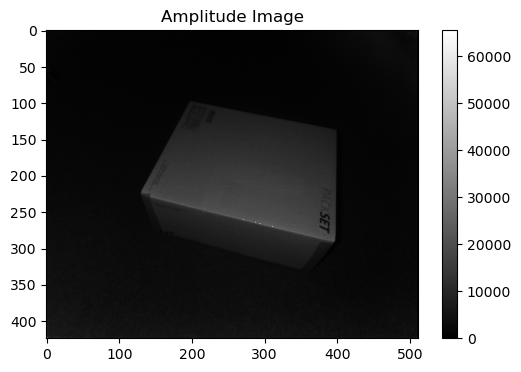

In [6]:
visualize_amplitude(ex1, 1)

In [7]:
import cv2

### Apply median filter

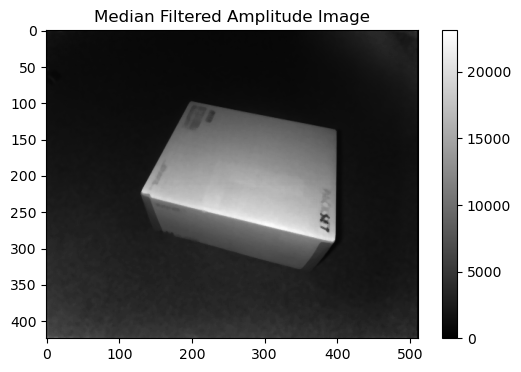

In [8]:
def visualize_amplitude_median_filter(example, num, filter_size=5, visualize=True):
    A = example['amplitudes' + str(num)]
    
    # Applying median filter
    A_filtered = cv2.medianBlur(A.astype(np.float32), filter_size)

    if visualize:
        plt.figure(figsize=(6, 4))
        plt.imshow(A_filtered, cmap='gray')
        plt.colorbar()
        plt.title('Median Filtered Amplitude Image')
        plt.show()
    
    return A_filtered

filtered_image = visualize_amplitude_median_filter(ex1, 1, filter_size=5)

# Estimating floor plane

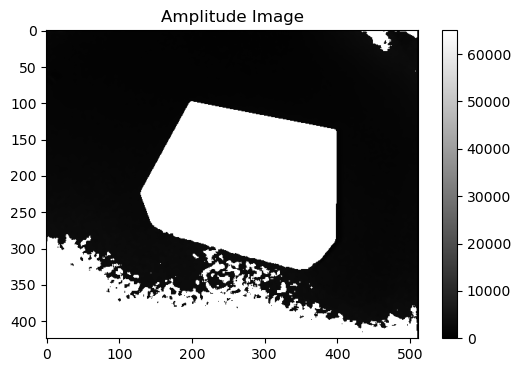

In [9]:
def estimate_the_floor_plane(example, num):
    A = example.copy()
    A[A > 3300] = 65000
    
    plt.figure(figsize=(6, 4))
    plt.imshow(A, cmap='gray')
    plt.colorbar()
    plt.title('Amplitude Image')
    return A
    
A = estimate_the_floor_plane(filtered_image,1)

In [10]:
def plot_image(image, title='Image'):
    plt.figure(figsize=(6, 4))
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.title(title)
    plt.show()

def apply_erosion(image, kernel_size=10):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

def apply_dilation(image, kernel_size=10):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    return dilated_image

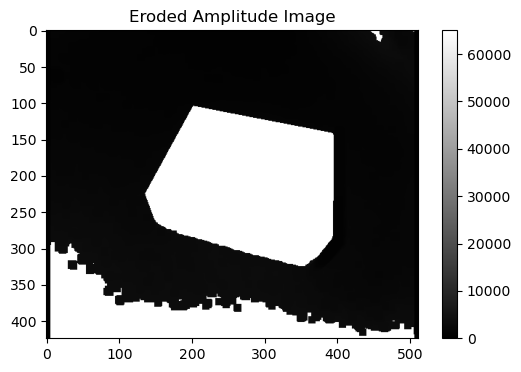

In [11]:
eroded_image = apply_erosion(A)
plot_image(eroded_image, title='Eroded Amplitude Image')

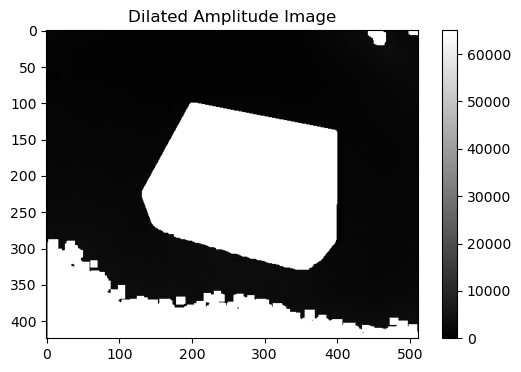

In [12]:
dilated_image = apply_dilation(eroded_image)
plot_image(dilated_image, title='Dilated Amplitude Image')

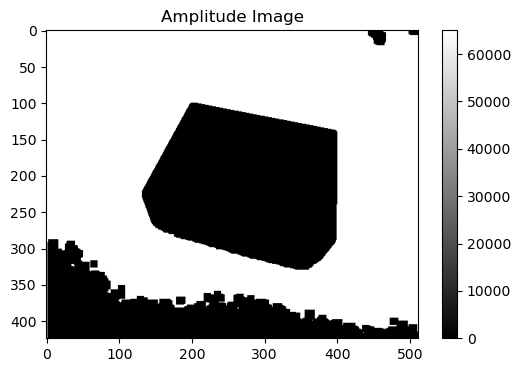

In [13]:
def estimate_the_floor_plane(example, num):
    A = example.copy()
    A[A <= 3300] = 0
    A[A == 65000] = 10
    A[A == 0] = 65000
    A[A == 10] = 0

    plt.figure(figsize=(6, 4))
    plt.imshow(A, cmap='gray')
    plt.colorbar()
    plt.title('Amplitude Image')
    return A
    
A = estimate_the_floor_plane(dilated_image,1)